In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('bankruptcy-prevention.csv', delimiter=';')
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


EDA

In [2]:
data.shape #to check number of rows and columns in the given dataset 

(250, 7)

In [3]:
data.dtypes 

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
data.describe() #to understand descriptive statistics of numerical columns 

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isna().sum() #to check null values 

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [7]:
data.duplicated().sum() #to check number of duplicated rows 

147

In [8]:
data.loc[data.duplicated()]      

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [9]:
data.drop_duplicates(inplace=True) 

In [10]:
data.shape

(103, 7)

In [11]:
data.duplicated().sum()

0

In [11]:
data['industrial_risk'].value_counts() #to know number of observation for each category(0,0.5,1) of a feature

0.5    36
0.0    35
1.0    32
Name: industrial_risk, dtype: int64

In [12]:
data[' management_risk'].value_counts()

1.0    42
0.5    32
0.0    29
Name:  management_risk, dtype: int64

In [13]:
data[' financial_flexibility'].value_counts()

0.5    36
1.0    34
0.0    33
Name:  financial_flexibility, dtype: int64

In [14]:
data[' credibility'].value_counts()

0.5    42
1.0    39
0.0    22
Name:  credibility, dtype: int64

In [16]:
data[' competitiveness'].value_counts()

1.0    53
0.5    26
0.0    24
Name:  competitiveness, dtype: int64

In [17]:
data[' operating_risk'].value_counts()

1.0    41
0.0    38
0.5    24
Name:  operating_risk, dtype: int64

In [8]:
data[' class'].value_counts()

non-bankruptcy    78
bankruptcy        25
Name:  class, dtype: int64

In [12]:
import warnings
warnings.filterwarnings('ignore')
data.corr() #to find correlation between numerical columns
#there is a moderate positive correlation between (financial flexibility and competitiveness) and 
#(credibility and competitiveness)


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.225742,-0.074246,0.056011,-0.208575,0.152581
management_risk,0.225742,1.000000,-0.163226,-0.112473,-0.125335,0.089500
financial_flexibility,-0.074246,-0.163226,1.000000,0.397757,0.525996,-0.000401
credibility,0.056011,-0.112473,0.397757,1.000000,0.524773,-0.110603
competitiveness,-0.208575,-0.125335,0.525996,0.524773,1.000000,-0.052165
operating_risk,0.152581,0.089500,-0.000401,-0.110603,-0.052165,1.000000


In [20]:
pd.crosstab(data['industrial_risk'], data[' class'])
#to understand how target variable is distributed and related with independent variables

class,bankruptcy,non-bankruptcy
industrial_risk,,
0.0,6,29
0.5,6,30
1.0,13,19


In [21]:
pd.crosstab(data[' management_risk'], data[' class'])

class,bankruptcy,non-bankruptcy
management_risk,,
0.0,4,25
0.5,7,25
1.0,14,28


In [21]:
pd.crosstab(data[' financial_flexibility'], data[' class'])

class,bankruptcy,non-bankruptcy
financial_flexibility,,
0.0,23,10
0.5,1,35
1.0,1,33


In [22]:
pd.crosstab(data[' credibility'], data[' class'])

class,bankruptcy,non-bankruptcy
credibility,,
0.0,18,4
0.5,5,37
1.0,2,37


In [23]:
pd.crosstab(data[' competitiveness'], data[' class'])

class,bankruptcy,non-bankruptcy
competitiveness,,
0.0,24,0
0.5,1,25
1.0,0,53


In [24]:
pd.crosstab(data[' operating_risk'], data[' class'])

class,bankruptcy,non-bankruptcy
operating_risk,,
0.0,7,31
0.5,5,19
1.0,13,28


VISUALIZATION

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

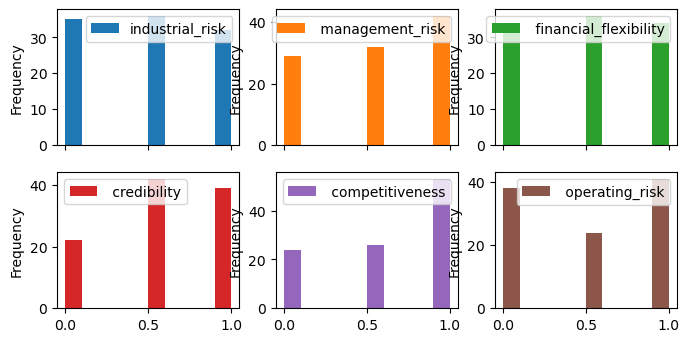

In [26]:
data.plot(kind='hist', subplots=True,layout=(3,3), figsize=(8,6));   #to undestand data distribution of independent column

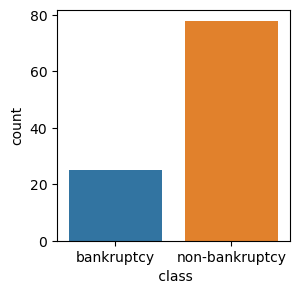

In [27]:
plt.figure(figsize=(3,3))
sns.countplot(x=' class', data=data)
plt.show()

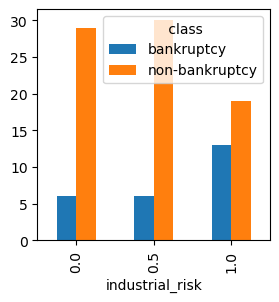

In [28]:
pd.crosstab(data['industrial_risk'], data[' class']).plot(kind='bar', figsize=(3,3));
#with the increase in industrial risk there is a greater chance for a  company going bankrupt

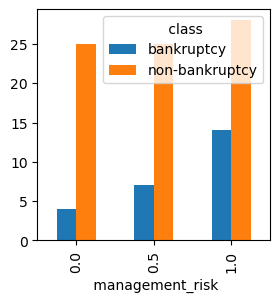

In [29]:
pd.crosstab(data[' management_risk'], data[' class']).plot(kind='bar', figsize=(3,3));
#high management_risk has a greater chance that a company go bankrupt

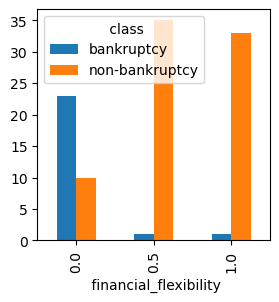

In [30]:
pd.crosstab(data[' financial_flexibility'], data[' class']).plot(kind='bar', figsize=(3,3));
#higher the financial flexibility of a company least chance for a company to go bankrupt

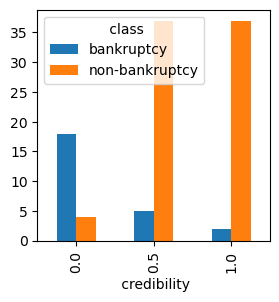

In [31]:
pd.crosstab(data[' credibility'], data[' class']).plot(kind='bar', figsize=(3,3));
#higher the credibility of a company least chance for a company to go bankrupt

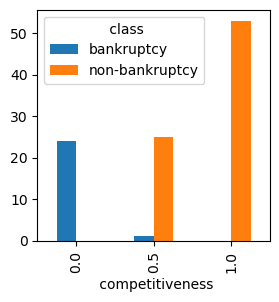

In [32]:
pd.crosstab(data[' competitiveness'], data[' class']).plot(kind='bar', figsize=(3,3));
#higher the competitiveness of a company least chance for a company to go bankrupt
#when the competitiveness of a company is 1 there is no observation going bankrupt 

In [33]:
data[(data[' competitiveness']==1)]
#out of 103 observations, 53 observations has  competitiveness=1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
110,0.0,0.0,1.0,1.0,1.0,0.0,non-bankruptcy
111,1.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
112,0.5,0.5,1.0,1.0,1.0,0.5,non-bankruptcy
113,0.0,0.0,0.5,1.0,1.0,0.0,non-bankruptcy
116,0.0,0.0,0.5,0.5,1.0,0.0,non-bankruptcy
118,0.0,0.0,1.0,0.5,1.0,0.0,non-bankruptcy
119,1.0,1.0,0.5,1.0,1.0,1.0,non-bankruptcy
123,1.0,1.0,0.5,0.5,1.0,1.0,non-bankruptcy
125,1.0,1.0,1.0,0.5,1.0,1.0,non-bankruptcy
126,0.5,0.5,0.5,1.0,1.0,0.5,non-bankruptcy


In [34]:
len(data[(data[' competitiveness']==1) & (data[' class']=='bankruptcy')])         
#of all observtaion where competiveness = 1 none of the companies has gone bankrupt

0

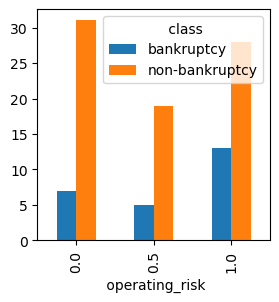

In [35]:
pd.crosstab(data[' operating_risk'], data[' class']).plot(kind='bar', figsize=(3,3));
#with the increasing operating risk, company has  a higher chance of going bankrupt

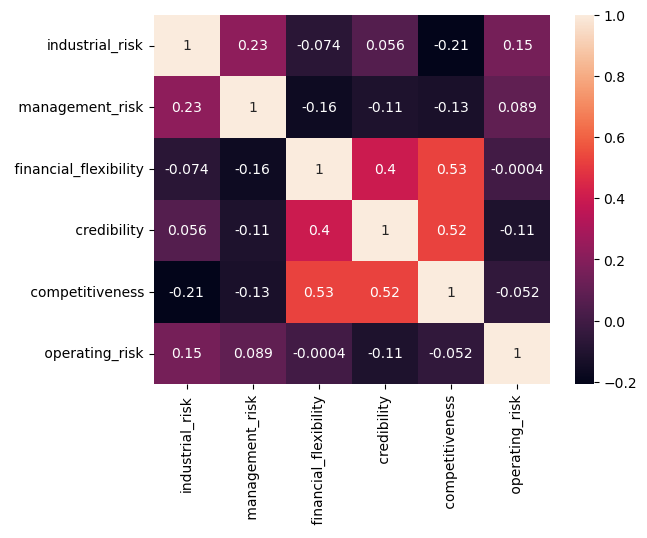

In [37]:
sns.heatmap(data.corr(), annot=True);

#MODEL BUILDING

In [14]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [92]:
data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data[' class']=label.fit_transform(data[' class'])

In [16]:
data.head()          #bankruptcy=0, non-bankruptcy=1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [17]:
data[' class'].value_counts()

1    78
0    25
Name:  class, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE# SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE
sm=SMOTE(random_state=42)
X=data.drop(' class',axis=1)
Y=data[' class']
X_resampled,Y_resampled=sm.fit_resample(X,Y)
data=pd.concat([X_resampled, Y_resampled],axis=1)
data[' class'].value_counts()

#considers a datapoint from minority class and selects a instance from same class and identifies k-nearest neighbors and 
#calculate difference and multiplies by a random value bwteen 0 & 1 to get new datapoint

0    78
1    78
Name:  class, dtype: int64

In [19]:
data.shape

(156, 7)

In [20]:
data.duplicated().sum()

0

LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=data.drop(' class', axis=1)
Y=data[' class']
modelLR=LogisticRegression()

In [22]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=42)

In [23]:
X_train.shape

(109, 6)

In [24]:
X_test.shape

(47, 6)

In [25]:
Y_train.shape

(109,)

In [26]:
Y_test.shape

(47,)

In [35]:
modelLR.fit(X_train, Y_train)
pred_train=modelLR.predict(X_train)
pred_test_LR=modelLR.predict(X_test)

In [36]:
modelLR.coef_

array([[-0.75643394, -0.50880474,  2.0348036 ,  1.78444068,  3.14114565,
        -0.4021933 ]])

In [37]:
X_train.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk'],
      dtype='object')

In [38]:
modelLR.intercept_

array([-1.70260974])

In [31]:
scoreLR_train=modelLR.score(X_train, Y_train)
scoreLR_train

0.9908256880733946

In [32]:
scoreLR_test=modelLR.score(X_test, Y_test)
scoreLR_test

0.9787234042553191

In [33]:
acc_train=np.mean(Y_train==pred_train)
acc_train

0.9908256880733946

In [39]:
acc_test=np.mean(Y_test==pred_test_LR)
acc_test

0.9787234042553191

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
print(classification_report(Y_test, pred_test_LR))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.96      1.00      0.98        25

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



In [41]:
confusion_matrix(Y_test, pred_test_LR)    # FP=1, 1 observation misclassified as non-bankrupt

array([[21,  1],
       [ 0, 25]], dtype=int64)

In [42]:
aucLR=roc_auc_score(Y_test, pred_test_LR)
aucLR

0.9772727272727273

KNN

In [116]:
X_train.shape

(109, 6)

In [117]:
X_test.shape

(47, 6)

In [118]:
Y_train.shape

(109,)

In [119]:
Y_test.shape

(47,)

In [43]:
#hyper parameter tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
modelKNN=KNeighborsClassifier()
n_neighbors=np.array(range(1,15))
param_grid=dict(n_neighbors=n_neighbors)
grid=GridSearchCV(estimator=modelKNN, param_grid=param_grid)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [44]:
grid.best_params_

{'n_neighbors': 1}

In [45]:
grid.best_score_

0.990909090909091

In [46]:
modelKNN=KNeighborsClassifier(n_neighbors=1)    
modelKNN.fit(X_train, Y_train)
score_KNN_train=modelKNN.score(X_train, Y_train)
score_KNN_train

1.0

In [47]:
score_KNN_test=modelKNN.score(X_test, Y_test)
score_KNN_test

1.0

In [48]:
pred_train=modelKNN.predict(X_train)
pred_test_KNN=modelKNN.predict(X_test)
train_acc=np.mean(Y_train==pred_train)
test_acc=np.mean(Y_test==pred_test_KNN)
print('train accuracy: ', train_acc)
print('Test accuracy : ', test_acc)

train accuracy:  1.0
Test accuracy :  1.0


In [49]:
print(classification_report(Y_test, pred_test_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        25

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [50]:
confusion_matrix(Y_test, pred_test_KNN) #no observation were misclassified

array([[22,  0],
       [ 0, 25]], dtype=int64)

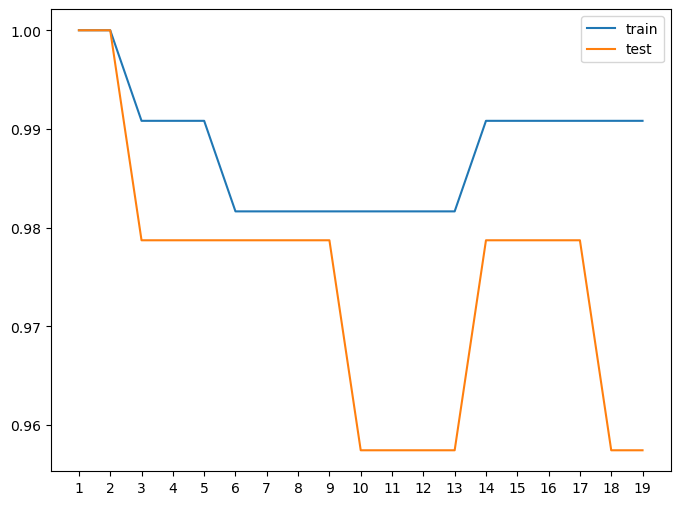

In [145]:
#visualising the result
acc=[]
for i in range(1,20):
    modelKNN=KNeighborsClassifier(n_neighbors=i)
    modelKNN.fit(X_train, Y_train)
    train_acc=np.mean(Y_train==modelKNN.predict(X_train))
    test_acc=np.mean(Y_test==modelKNN.predict(X_test))
    acc.append([train_acc, test_acc])

plt.figure(figsize=(8,6))
plt.plot(range(1,20), [i[0] for i in acc])
plt.plot(range(1,20), [i[1] for i in acc])
plt.legend(['train','test'])
plt.xticks(range(1,20))
plt.show()

In [146]:
# when n_neighbors=2
modelKNN=KNeighborsClassifier(n_neighbors=2)
modelKNN.fit(X_train, Y_train)
print('train accuracy :', modelKNN.score(X_train, Y_train))
print('test accuracy : ',modelKNN.score(X_test, Y_test))

#when n_neighbors=1 / 2 both train and test acc is 1

train accuracy : 1.0
test accuracy :  1.0


DECISION TREE

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
criterion=['entropy', 'gini']
max_depth=range(1,10)
param_grid=dict(criterion=criterion, max_depth=max_depth)
modelDT=DecisionTreeClassifier()
grid=GridSearchCV(estimator=modelDT, param_grid=param_grid)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10)})

In [52]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 1}

In [53]:
grid.best_score_

0.990909090909091

In [54]:
modelDT=DecisionTreeClassifier(criterion='entropy', max_depth=1)   
modelDT.fit(X_train, Y_train)
score_DT_train=modelDT.score(X_train, Y_train)
score_DT_train


1.0

In [55]:
score_DT_test=modelDT.score(X_test, Y_test)
score_DT_test

0.9787234042553191

In [56]:
modelDT.feature_importances_   #the model is classifying data based on competitiveness 

array([0., 0., 0., 0., 1., 0.])

In [154]:
X.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk'],
      dtype='object')

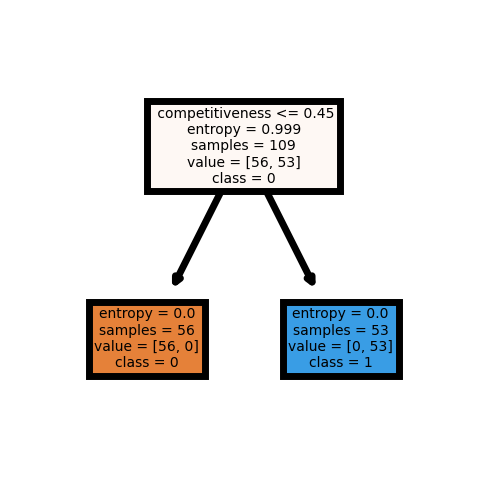

In [156]:
fn=['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk']
cn=['0','1']
from sklearn import tree
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(1,1), dpi=500)
tree.plot_tree(modelDT, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [58]:
pred_test_DT=modelDT.predict(X_test)

RANDOM FOREST

In [171]:
from sklearn.ensemble import RandomForestClassifier
max_features=range(1,7)
criterion=['entropy', 'gini']
max_depth=range(1,10)
param_grid=dict(max_features=max_features, criterion=criterion, max_depth=max_depth)
modelRF=RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
grid=GridSearchCV(estimator=modelRF, param_grid=param_grid)
grid.fit(X_train, Y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 1}

In [172]:
grid.best_score_

1.0

In [59]:
from sklearn.ensemble import RandomForestClassifier
modelRF=RandomForestClassifier(criterion='entropy', max_features=1,max_depth=3, n_estimators=100, oob_score=True, random_state=42)


In [60]:
modelRF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=1,
                       oob_score=True, random_state=42)

In [61]:
modelRF.score(X_train, Y_train)

1.0

In [62]:
modelRF.score(X_test, Y_test)

1.0

In [63]:
modelRF.oob_score_
#the aggregate/average score which is found by comparing the predictions made for OOB (out of bag samples)
#with their true values

1.0

In [64]:
pred_train=modelRF.predict(X_train)
pred_test_RF=modelRF.predict(X_test)
acc_RF_train=np.mean(Y_train==pred_train)
acc_RF_test=np.mean(Y_test==pred_test_RF)

In [65]:
acc_RF_train

1.0

In [66]:
acc_RF_test

1.0

In [67]:
modelRF.feature_importances_

array([0.06476116, 0.06732241, 0.21224971, 0.20956574, 0.40472221,
       0.04137876])

In [196]:
X_train.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk'],
      dtype='object')

SUPPORT VECTOR MACHINES

In [68]:
from sklearn.svm import SVC
kernel=['linear','poly','rbf','sigmoid']
param_grid=dict(kernel=kernel)
modelSM=SVC()
grid=GridSearchCV(estimator=modelSM, param_grid=param_grid)
grid.fit(X_train, Y_train)
grid.best_params_

{'kernel': 'linear'}

In [69]:
grid.best_score_

0.990909090909091

In [70]:
modelSM=SVC(kernel='linear', probability=True)
modelSM.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [71]:
acc_trainSM=modelSM.score(X_train, Y_train)
acc_testSM=modelSM.score(X_test, Y_test)

In [72]:
acc_trainSM

0.9908256880733946

In [73]:
acc_testSM

0.9787234042553191

In [74]:
pred_test_SVM=modelSM.predict(X_test)

In [75]:
df_result=pd.DataFrame({'Model': ['Logistic Regression','KNN', 'Decision Tree','Random Forest','SVC'], 'Train_acc':[scoreLR_train,score_KNN_train, 
                 score_DT_train,acc_RF_train, acc_trainSM], 'Test_acc':[scoreLR_test,score_KNN_test,score_DT_test,acc_RF_test, acc_testSM]})

In [76]:
df_result

,Model,Train_acc,Test_acc
0,Logistic Regression,0.990826,0.978723
1,KNN,1.000000,1.000000
2,Decision Tree,1.000000,0.978723
3,Random Forest,1.000000,1.000000
4,SVC,0.990826,0.978723


In [ ]:
#FEATURE ENGINEERING

In [15]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.500000,1.00000,0.00000,0.0,0.00000,0.500000,0
1,0.000000,1.00000,0.00000,0.0,0.00000,1.000000,0
2,1.000000,0.00000,0.00000,0.0,0.00000,1.000000,0
3,0.500000,0.00000,0.00000,0.5,0.00000,1.000000,0
4,1.000000,1.00000,0.00000,0.0,0.00000,1.000000,0
...,...,...,...,...,...,...,...
151,1.000000,1.00000,0.00000,0.5,0.00000,0.604912,0
152,0.000000,0.69702,0.00000,0.0,0.19702,0.500000,0
153,1.000000,1.00000,0.03685,0.0,0.00000,1.000000,0
154,0.674461,0.50000,0.00000,0.0,0.00000,1.000000,0


In [16]:
#by performing feature engineering
data['comp_cred_finflex']=data[' competitiveness']*data[' credibility']*data[' financial_flexibility']

In [17]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,comp_cred_finflex
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.0
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.0


In [18]:
data=data.drop([' competitiveness',' credibility',' financial_flexibility'], axis=1)
data.columns

Index(['industrial_risk', ' management_risk', ' operating_risk', ' class',
       'comp_cred_finflex'],
      dtype='object')

In [19]:
X=data.drop(' class',axis=1)
Y=data[' class']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=42)

In [20]:
X_train.shape

(109, 4)

In [21]:
X_test.shape

(47, 4)

In [22]:
Y_train.shape

(109,)

In [23]:
Y_test.shape

(47,)

LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
modelLR.fit(X_train,Y_train)
LR_train_acc=modelLR.score(X_train,Y_train)
LR_train_acc

0.8807339449541285

In [41]:
LR_test_acc=modelLR.score(X_test,Y_test)
LR_test_acc

0.7872340425531915

In [77]:
from sklearn.metrics import classification_report
pred_test=modelLR.predict(X_test)
print(classification_report(pred_test,Y_test))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.72      0.86      0.78        21

    accuracy                           0.79        47
   macro avg       0.79      0.79      0.79        47
weighted avg       0.80      0.79      0.79        47



KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors=range(1,20)
param_grid=dict(n_neighbors=n_neighbors)
modelKNN=KNeighborsClassifier()
grid=GridSearchCV(estimator=modelKNN,param_grid=param_grid)
grid.fit(X_train,Y_train)
grid.best_params_

{'n_neighbors': 1}

In [79]:
grid.best_score_

0.880952380952381

In [80]:
modelKNN=KNeighborsClassifier(n_neighbors=1)
modelKNN.fit(X_train,Y_train)
KNN_train_acc=modelKNN.score(X_train,Y_train)
KNN_train_acc

0.9724770642201835

In [81]:
KNN_test_acc=modelKNN.score(X_test,Y_test)
KNN_test_acc

0.6808510638297872

In [82]:
pred_test=modelKNN.predict(X_test)
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69        22
           1       0.75      0.60      0.67        25

    accuracy                           0.68        47
   macro avg       0.69      0.69      0.68        47
weighted avg       0.69      0.68      0.68        47



DECISION TREE

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
criterion=['entropy','gini']
max_depth=range(1,10)
param_grid=dict(criterion=criterion,max_depth=max_depth)
modelDT=DecisionTreeClassifier()
grid=GridSearchCV(estimator=modelDT, param_grid=param_grid)
grid.fit(X_train,Y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [84]:
modelDT=DecisionTreeClassifier(criterion='entropy',max_depth=3)
modelDT.fit(X_train,Y_train)
modelDT.feature_importances_

array([0.12477051, 0.        , 0.02924196, 0.84598753])

In [85]:
X_train.columns

Index(['industrial_risk', ' management_risk', ' operating_risk',
       'comp_cred_finflex'],
      dtype='object')

In [86]:
DT_train_acc=modelDT.score(X_train,Y_train)
DT_train_acc

0.9541284403669725

In [87]:
DT_test_acc=modelDT.score(X_test,Y_test)
DT_test_acc

0.851063829787234

In [88]:
pred_test=modelDT.predict(X_test)

In [89]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.95      0.76      0.84        25

    accuracy                           0.85        47
   macro avg       0.86      0.86      0.85        47
weighted avg       0.87      0.85      0.85        47



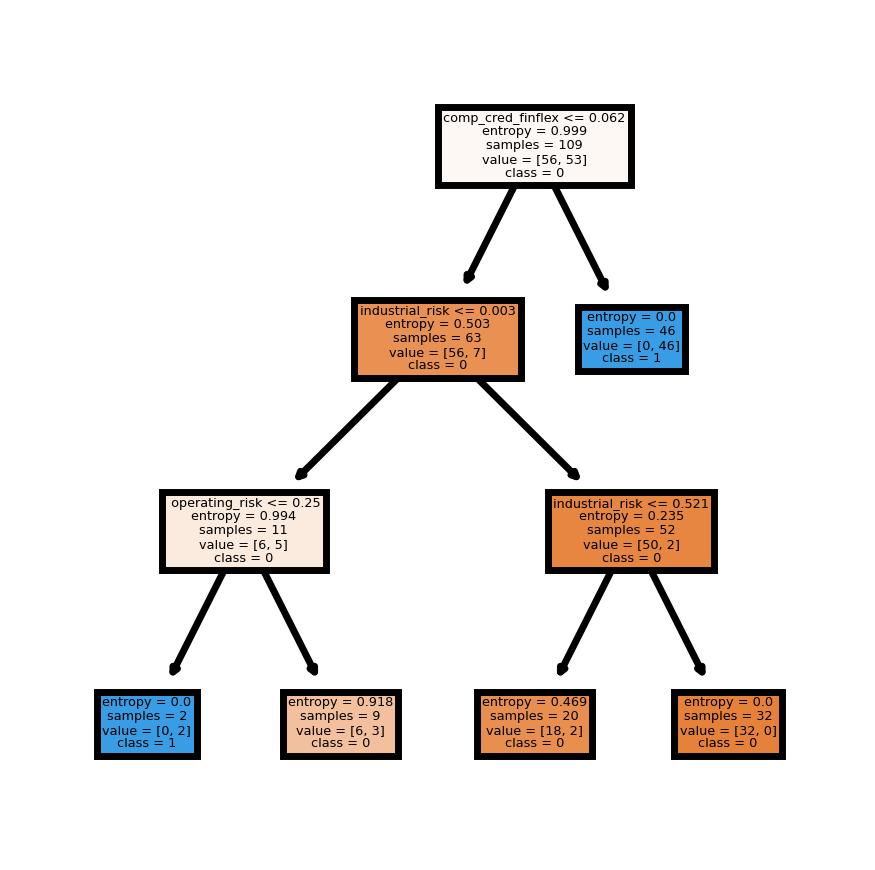

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
fn=['industrial_risk', ' management_risk', ' operating_risk',
       'comp_cred_finflex']
cn=['0','1']
fig,axes=plt.subplots(nrows=1,ncols=1,dpi=500,figsize=(2,2))
tree.plot_tree(modelDT, feature_names=fn,class_names=cn,filled=True)
plt.show()

RANDOM FOREST

In [92]:
from sklearn.ensemble import RandomForestClassifier
max_features=range(1,6)
criterion=['gini','entropy']
max_depth=range(1,10)
modelRF=RandomForestClassifier(n_estimators=100,oob_score=True,random_state=42)
param_grid=dict(max_features=max_features,criterion=criterion,max_depth=max_depth)
grid=GridSearchCV(estimator=modelRF,param_grid=param_grid)
grid.fit(X_train,Y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 4}

In [93]:
grid.best_score_

0.9445887445887446

In [94]:
modelRF=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3,max_features=4,oob_score=True,random_state=42)

In [95]:
modelRF.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=4,
                       oob_score=True, random_state=42)

In [96]:
RF_train_acc=modelRF.score(X_train,Y_train)
RF_train_acc

0.9541284403669725

In [97]:
RF_test_acc=modelRF.score(X_test,Y_test)
RF_test_acc

0.851063829787234

In [98]:
modelRF.feature_importances_

array([0.11334264, 0.01414403, 0.05331001, 0.81920332])

In [99]:
pred_test=modelRF.predict(X_test)
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.95      0.76      0.84        25

    accuracy                           0.85        47
   macro avg       0.86      0.86      0.85        47
weighted avg       0.87      0.85      0.85        47



In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,pred_test)

array([[21,  1],
       [ 6, 19]], dtype=int64)

SVM

In [46]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
kernel=['poly','linear','rbf','sigmoid']
modelSVM=SVC()
param_grid=dict(kernel=kernel)
grid=GridSearchCV(estimator=modelSVM,param_grid=param_grid)
grid.fit(X_train,Y_train)
grid.best_params_

{'kernel': 'rbf'}

In [102]:
modelSVM=SVC(kernel='rbf')
modelSVM.fit(X_train,Y_train)
SVM_train_acc=modelSVM.score(X_train,Y_train)
SVM_train_acc

0.9357798165137615

In [103]:
SVM_test_acc=modelSVM.score(X_test,Y_test)
SVM_test_acc

0.8297872340425532

In [104]:
pred_test=modelSVM.predict(X_test)
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.90      0.76      0.83        25

    accuracy                           0.83        47
   macro avg       0.84      0.83      0.83        47
weighted avg       0.84      0.83      0.83        47



In [105]:
df_new=pd.DataFrame({'model':['Logistic Regression','KNN','Decision Tree','Random Forest','SVM'], 'train_acc':[LR_train_acc,
   KNN_train_acc,DT_train_acc,RF_train_acc,SVM_train_acc],'test_acc':[LR_test_acc,KNN_test_acc,DT_test_acc,RF_test_acc,SVM_test_acc]})

In [106]:
df_new

,model,train_acc,test_acc
0,Logistic Regression,0.880734,0.787234
1,KNN,0.972477,0.680851
2,Decision Tree,0.954128,0.851064
3,Random Forest,0.954128,0.851064
4,SVM,0.935780,0.829787


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
modelRF=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3,max_features=4,oob_score=True,random_state=42)
kf=KFold(n_splits=10)
results=cross_val_score(modelRF,X_train,Y_train,cv=kf)
results.mean()*100

93.45454545454548

MODEL EVALUATION

In [107]:
#LOGISTIC REGRESSION


from sklearn.model_selection import KFold, cross_val_score
kf=KFold(n_splits=10)
results_LR=cross_val_score(modelLR,X,Y,cv=kf, scoring='accuracy')
modelLR_results=results_LR.mean()*100
modelLR_results

98.04166666666667

In [108]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix,classification_report
accuracy=accuracy_score(Y_test,pred_test_LR)
precision=precision_score(Y_test,pred_test_LR)
recall=recall_score(Y_test,pred_test_LR)
f1=f1_score(Y_test,pred_test_LR)
print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)
print('f1 :', f1)
print(confusion_matrix(Y_test,pred_test_LR))


accuracy : 0.9787234042553191
precision : 0.9615384615384616
recall : 1.0
f1 : 0.9803921568627451
[[21  1]
 [ 0 25]]


In [109]:
#KNN


results_KNN=cross_val_score(modelKNN,X,Y,cv=kf, scoring='accuracy')
modelKNN_results=results_KNN.mean()*100
modelKNN_results

99.375

In [110]:
accuracy=accuracy_score(Y_test,pred_test_KNN)
precision=precision_score(Y_test,pred_test_KNN)
recall=recall_score(Y_test,pred_test_KNN)
f1=f1_score(Y_test,pred_test_KNN)
print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)
print('f1 :', f1)
print(confusion_matrix(Y_test,pred_test_KNN))

accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
[[22  0]
 [ 0 25]]


In [111]:
#DECISION TREE


results_DT=cross_val_score(modelDT,X,Y,cv=kf, scoring='accuracy')
modelDT_results=results_DT.mean()*100
modelDT_results

99.375

In [112]:
accuracy=accuracy_score(Y_test,pred_test_DT)
precision=precision_score(Y_test,pred_test_DT)
recall=recall_score(Y_test,pred_test_DT)
f1=f1_score(Y_test,pred_test_DT)
print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)
print('f1 :', f1)
print(confusion_matrix(Y_test,pred_test_DT))

accuracy : 0.9787234042553191
precision : 0.9615384615384616
recall : 1.0
f1 : 0.9803921568627451
[[21  1]
 [ 0 25]]


In [113]:
#RANDOM  FOREST


results_RF=cross_val_score(modelRF,X,Y,cv=kf, scoring='accuracy')
modelRF_results=results_RF.mean()*100
modelRF_results

99.33333333333334

In [114]:
accuracy=accuracy_score(Y_test,pred_test_RF)
precision=precision_score(Y_test,pred_test_RF)
recall=recall_score(Y_test,pred_test_RF)
f1=f1_score(Y_test,pred_test_RF)
print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)
print('f1 :', f1)
print(confusion_matrix(Y_test,pred_test_RF))

accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
[[22  0]
 [ 0 25]]


In [115]:
#SUPPORT VECTOR MACHINES

results_SM=cross_val_score(modelSM,X,Y,cv=kf,scoring='accuracy')
modelSM_results=results_SM.mean()*100
modelSM_results

98.70833333333333

In [116]:
accuracy=accuracy_score(Y_test,pred_test_SVM)
precision=precision_score(Y_test,pred_test_SVM)
recall=recall_score(Y_test,pred_test_SVM)
f1=f1_score(Y_test,pred_test_SVM)
print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)
print('f1 :', f1)
print(confusion_matrix(Y_test,pred_test_SVM))

accuracy : 0.9787234042553191
precision : 0.9615384615384616
recall : 1.0
f1 : 0.9803921568627451
[[21  1]
 [ 0 25]]
